# Einstein Rosen waves and the Geroch Group by Penna
##  Geoff Cope
##  Univeristy of Utah
##  January 5th, 2022

There's a problem with separation of variables.... setting the X equation equal to the negative of k squared does give the right Bessel functions.  However, setting the Y equation equal to the positive of k squared gives exponentials not sin and cos.  So, until we find the mistake, we'll set the Y equation also equal to the negative of k squared to get the appropriate trig functions.  There's a minus sign wrong somewhere...find it.

https://arxiv.org/abs/2106.13252

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,rho,phi,z,dt,drho,dphi,dz = symbols('t rho phi z dt drho dphi dz')

In [4]:
gamma = Function('gamma')(rho,t)
gamma

In [5]:
psi = Function('psi')(rho,t)
psi

In [6]:
variables = Matrix( [t,rho,phi,z] )
variables

⎡t⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [7]:
differentials = Matrix( [dt,drho,dphi,dz] ) 
differentials

⎡ dt ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [8]:
lineElement = expand(exp(2*(gamma-psi))*( - dt**2 + drho**2 ) + exp(-2*psi)*rho**2*dphi**2 + exp(2*psi)*dz**2) 
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅γ(ρ, t)  -2⋅ψ(ρ, t)                                                    ⎤
⎢-ℯ         ⋅ℯ                      0                   0             0     ⎥
⎢                                                                           ⎥
⎢                          2⋅γ(ρ, t)  -2⋅ψ(ρ, t)                            ⎥
⎢           0             ℯ         ⋅ℯ                  0             0     ⎥
⎢                                                                           ⎥
⎢                                                  2  -2⋅ψ(ρ, t)            ⎥
⎢           0                       0             ρ ⋅ℯ                0     ⎥
⎢                                                                           ⎥
⎢                                                                  2⋅ψ(ρ, t)⎥
⎣           0                       0                   0         ℯ         ⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡  2⋅γ(ρ, t)  -2⋅ψ(ρ, t)                                                    ⎤
⎢-ℯ         ⋅ℯ                      0                   0             0     ⎥
⎢                                                                           ⎥
⎢                          2⋅γ(ρ, t)  -2⋅ψ(ρ, t)                            ⎥
⎢           0             ℯ         ⋅ℯ                  0             0     ⎥
⎢                                                                           ⎥
⎢                                                  2  -2⋅ψ(ρ, t)            ⎥
⎢           0                       0             ρ ⋅ℯ                0     ⎥
⎢                                                                           ⎥
⎢                                                                  2⋅ψ(ρ, t)⎥
⎣           0                       0                   0         ℯ         ⎦

In [12]:
from einsteinpy.symbolic import *

In [13]:
syms = sympy.symbols("t rho phi z")
t,rho,phi,z = syms

In [14]:
metric = MetricTensor(m,syms)

In [15]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂             ∂            ∂             ∂                                                                            ⎤  ⎡∂            
⎢⎢──(γ(ρ, t)) - ──(ψ(ρ, t))  ──(γ(ρ, t)) - ──(ψ(ρ, t))               0                                0                 ⎥  ⎢──(γ(ρ, t)) -
⎢⎢∂t            ∂t           ∂ρ            ∂ρ                                                                           ⎥  ⎢∂ρ           
⎢⎢                                                                                                                      ⎥  ⎢             
⎢⎢∂             ∂            ∂             ∂                                                                            ⎥  ⎢∂            
⎢⎢──(γ(ρ, t)) - ──(ψ(ρ, t))  ──(γ(ρ, t)) - ──(ψ(ρ, t))               0                                0                 ⎥  ⎢──(γ(ρ, t)) -
⎢⎢∂ρ            ∂ρ           ∂t            ∂t                                                                           ⎥  ⎢∂t           
⎢⎢                                

In [16]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛  2              2              2                           2     2         ⎞                                                        
⎢  ⎜ ∂              ∂              ∂               ⎛∂          ⎞     ∂          ⎟   ∂             ∂                                      
⎢ρ⋅⎜───(γ(ρ, t)) - ───(γ(ρ, t)) - ───(ψ(ρ, t)) - 2⋅⎜──(ψ(ρ, t))⎟  + ───(ψ(ρ, t))⎟ + ──(γ(ρ, t)) - ──(ψ(ρ, t))                            
⎢  ⎜  2              2              2              ⎝∂t         ⎠      2         ⎟   ∂ρ            ∂ρ                                     
⎢  ⎝∂ρ             ∂t             ∂ρ                                ∂t          ⎠                                                        
⎢────────────────────────────────────────────────────────────────────────────────────────────────────────────                            
⎢                                                     ρ                                                                                  
⎢                                 

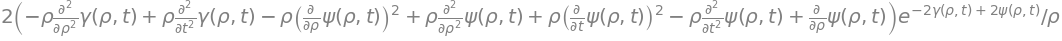

In [17]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [18]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

⎡                                        ∂                                               ∂                                               
⎢               2                2   1.0⋅──(γ(ρ, t))                                     ──(γ(ρ, t))                                     
⎢  ⎛∂          ⎞    ⎛∂          ⎞        ∂ρ                    ∂           ∂             ∂t                                              
⎢- ⎜──(ψ(ρ, t))⎟  - ⎜──(ψ(ρ, t))⎟  + ───────────────       - 2⋅──(ψ(ρ, t))⋅──(ψ(ρ, t)) + ───────────                                     
⎢  ⎝∂ρ         ⎠    ⎝∂t         ⎠           ρ                  ∂ρ          ∂t                 ρ                                          
⎢                                                                                                                                        
⎢                                   ∂                                                         ∂                                          
⎢                                 

In [19]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [20]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

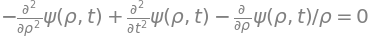

In [21]:
bessel = Eq(expand((-1/rho)*Ric.tensor()[2,2].args[1]),0)
bessel

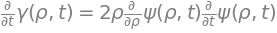

In [22]:
dgammadt = Eq( diff(gamma,t),solve( Ric.tensor()[1,0], diff(gamma,t) )[0] ) 
dgammadt 

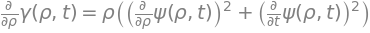

In [23]:
dgammadrho = Eq( diff(gamma,rho),solve( simplify(einst.tensor())[0,0], diff(gamma,rho) )[0] ) 
dgammadrho

In [25]:
vacuumFieldEquations = Matrix([bessel,dgammadt,dgammadrho])
vacuumFieldEquations

⎡                                 ∂               ⎤
⎢     2              2            ──(ψ(ρ, t))     ⎥
⎢    ∂              ∂             ∂ρ              ⎥
⎢ - ───(ψ(ρ, t)) + ───(ψ(ρ, t)) - ─────────── = 0 ⎥
⎢     2              2                 ρ          ⎥
⎢   ∂ρ             ∂t                             ⎥
⎢                                                 ⎥
⎢    ∂                 ∂           ∂              ⎥
⎢    ──(γ(ρ, t)) = 2⋅ρ⋅──(ψ(ρ, t))⋅──(ψ(ρ, t))    ⎥
⎢    ∂t                ∂ρ          ∂t             ⎥
⎢                                                 ⎥
⎢                ⎛             2                2⎞⎥
⎢∂               ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟⎥
⎢──(γ(ρ, t)) = ρ⋅⎜⎜──(ψ(ρ, t))⎟  + ⎜──(ψ(ρ, t))⎟ ⎟⎥
⎣∂ρ              ⎝⎝∂ρ         ⎠    ⎝∂t         ⎠ ⎠⎦

In [26]:
X, Y = map(Function, 'XY')

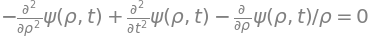

In [27]:
eq = vacuumFieldEquations[0]
eq

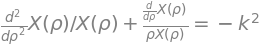

In [40]:
xODE = Eq(pde_separate( eq, psi, [X(rho),Y(t)])[0] , -k**2 ) 
xODE

In [42]:
xSolution = dsolve( xODE , X(rho))
xSolution 

In [43]:
#  Here we arbitrarily set one of the Bessel functions equal to zero... fix this later
xSolutionParticular = xSolution.subs(xSolution.args[1].args[0].args[0],1).subs(xSolution.args[1].args[1].args[0],0)
xSolutionParticular

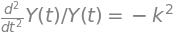

In [46]:
yODE = Eq( pde_separate( eq, psi, [X(rho),Y(t)])[1] ,  -k**2 ) 
yODE

In [47]:
ySolution = dsolve( yODE , Y(t))
ySolution 

In [49]:
#  Here we arbitrarily set cos equal to zero... fix this later
ySolutionParticular = ySolution.subs(ySolution.args[1].args[0].args[0],0).subs(ySolution.args[1].args[1].args[0],1)
ySolutionParticular

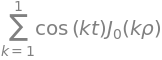

In [52]:
#  It looks like they only keep the k is one term.... 
Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,1) )

In [56]:
equation2pt2 = Eq(psi, Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,1) ).doit() ) 
equation2pt2

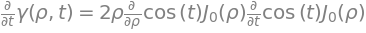

In [59]:
dgammadt = vacuumFieldEquations[1].subs(equation2pt2.args[0],equation2pt2.args[1] )
dgammadt

In [60]:
dgammadt.doit()

In [61]:
#  For the appropriate choice of F(rho) this should be equivalent to equation 2.3 below 
integrateGammaWRTt = pdsolve( expand(dgammadt.doit()) )
integrateGammaWRTt 

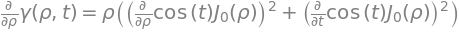

In [62]:
dgammadrho = vacuumFieldEquations[2].subs(equation2pt2.args[0],equation2pt2.args[1] )
dgammadrho

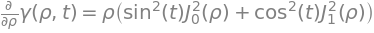

In [63]:
dgammadrho.doit()

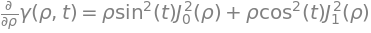

In [64]:
expand(dgammadrho.doit())

In [65]:
integrateGammaWRTrho = pdsolve( expand(dgammadrho.doit()) )
integrateGammaWRTrho

In [70]:
equation2pt3 = integrateGammaWRTrho.subs( integrateGammaWRTrho.args[1].args[3],0)
equation2pt3